# Extended Graham scan algorithm

Use the cell below for all python code needed to realise the extended Graham scan algorithm (including any auxiliary data structures and functions you might need). The `extendedgrahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [13]:
import math


class Stack:
    def __init__(self):
        self.items = []

    def is_empty(self):
        return self.items == []
    
    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)

    def next_to_top(self):
        return self.items[len(self.items) - 2]

    def get_items(self):
        return self.items
    
    def get_numbered_items(self, number):
        return self.items[number]


def remove_interior_points(list_of_points):
    min_x = find_west(list_of_points)
    max_x = find_east(list_of_points)
    min_y = find_south(list_of_points)
    max_y = find_north(list_of_points)
    refined_list = []
    
    for point in list_of_points:
        if (point[0] > min_x or point[0] < max_x) and (point[1] > min_y or point[1] < max_y):
            refined_list.append(point)
            
    return refined_list
    

def extendedgrahamscan(input_set):
    global lowest_point
    g_stack = Stack()
    
    #the new, smaller list
    refined_list = remove_interior_points(input_set)
    lowest_point = find_lowest_point(input_set)
    
    sorted_list = sorted(refined_list, key = angle_between_leftmost_lowest)

    for point in sorted_list:
        while g_stack.size() > 2 and ccw(g_stack.next_to_top(), g_stack.peek(), point) <=  0:
            g_stack.pop()
        g_stack.push(point)
    g_stack.push(sorted_list[len(sorted_list) - 1])
    
    return g_stack
    
def get_elems_stack(stack):
    list_stack = []
    for elem_num in range (0, stack.size() -1):
        elemSearched = stack.get_numbered_items(elem_num)
        list_stack.append(elemSearched)
    return list_stack
    
    
def angle_between_leftmost_lowest(coord):
    global lowest_point
    b = lowest_point[0]-coord[0]
    if b == 0:
        return 0
    else:
        angle = (lowest_point[1]-coord[1]) / b 
        if angle >= 0:
            angle = math.atan(angle)
        else:
            angle = math.atan(angle) + math.pi
        return angle

def ccw(next_to_top, top_of_stack, point):
    return (top_of_stack[1] - point[1]) * (next_to_top[0] - point[0]) - (next_to_top[1] - point[1]) * (top_of_stack[0] - point[0])

def find_north(list_of_points):
    max_y = 0
    for point in list_of_points:
        if point[1] > max_y:
            max_y = point[1]
    return max_y

def find_south(list_of_points):
    min_y = 32767
    for point in list_of_points:
        if point[1] < min_y:
            min_y = point[1]
    return min_y

def find_east(list_of_points):
    max_x = 0
    for point in list_of_points:
        if point[0] > max_x:
            max_x = point[0]
    return max_x

def find_west(list_of_points):
    min_x = 32767
    for point in list_of_points:
        if point[0] < min_x:
            min_x = point[0]
    return min_x
    
def find_lowest_point(list_of_points):
    # lowest y-coor and if same, lowest x-coor
    min_y = 32767
    min_x = 32767
    for point in list_of_points:
        if point[1] < min_y:
            min_y = point[1]
            min_x = point[0]
        elif point[1] == min_y:
            if point[0] < min_x:
                min_x = point[0]
    return min_x, min_y
   

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [14]:
import random

#code for random data generation
def generate_points(number_of_points):
    input_set = []

    for point in range(number_of_points):
        x = random.randint(0,32767)
        y = random.randint(0,32767)

        input_set.append((x,y))
    
    return input_set

#code for worst case data generation



Use the cell below for all python code needed to test the `extendedgrahamscan()` function on the data generated above.

In [17]:
import timeit

#test code

input_set_100 = generate_points(100)
input_set_500 = generate_points(500)
input_set_1000 = generate_points(1000)
input_set_5000 = generate_points(5000)
input_set_10000 = generate_points(10000)
input_set_15000 = generate_points(15000)
input_set_20000 = generate_points(20000)

start_time = timeit.default_timer()
n = 100
extendedgrahamscan(input_set_100)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")

start_time = timeit.default_timer()
n = 500
extendedgrahamscan(input_set_500)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")

start_time = timeit.default_timer()
n = 1000
extendedgrahamscan(input_set_1000)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")

start_time = timeit.default_timer()
n = 5000
extendedgrahamscan(input_set_5000)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")

start_time = timeit.default_timer()
n = 10000
extendedgrahamscan(input_set_10000)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")

start_time = timeit.default_timer()
n = 15000
extendedgrahamscan(input_set_15000)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")

start_time = timeit.default_timer()
n = 20000
extendedgrahamscan(input_set_20000)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")



Time taken for 100 elements: 
0.0007465999997293693

Time taken for 500 elements: 
0.00920499999938329

Time taken for 1000 elements: 
0.009325600000011036

Time taken for 5000 elements: 
0.03509810000014113

Time taken for 10000 elements: 
0.07472599999982776

Time taken for 15000 elements: 
0.12272119999943243

Time taken for 20000 elements: 
0.15751920000002428



*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

generated: 
[(6852, 30047), (29580, 28227), (28108, 2030), (22235, 26273), (25215, 31712), (23047, 22655), (24678, 10312), (19275, 3498), (26214, 25249), (305, 14964), (15889, 19735), (30338, 20177), (714, 22865), (1304, 18108), (31756, 24477), (3031, 25420), (13196, 15337), (24535, 32566), (3574, 5812), (20242, 24961), (11102, 15029), (3634, 2474), (31648, 27068), (26211, 24826), (25848, 4610), (28562, 27786), (17007, 11065), (4425, 1869), (12049, 10967), (22842, 1030), (21166, 5147), (18409, 1226), (30904, 27242), (2660, 21668), (14285, 24333), (20775, 10343), (4857, 9737), (11813, 15323), (12773, 5540), (24283, 6096), (12208, 2848), (15053, 8220), (4201, 19226), (29527, 3735), (7450, 15492), (30048, 23229), (5877, 7038), (4235, 17335), (25897, 12501), (16911, 32640), (20042, 28236), (24821, 27327), (5714, 16754), (7758, 12127), (15098, 27639), (314, 10848), (1420, 29155), (13013, 3830), (16322, 10330), (18443, 11854), (25193, 32028), (5710, 21816), (15602, 31060), (11420, 5045), (16

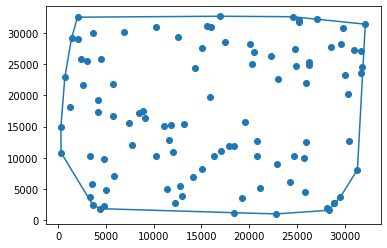

In [16]:
import matplotlib.pyplot as plt

inputSet = generate_points(100) # list of tuples
intermediate = extendedgrahamscan(inputSet) # stack
outputSet = get_elems_stack(intermediate)
print("generated: ")
print(inputSet)
print("stack: ")
print(intermediate)
print("final list: ")
print(outputSet)
# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

# inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
# outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 